
## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### The Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

###### import useful libarys and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
print(df.info(), '\n\n', df.describe().T, '\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

-------

##### We see most of the loans are fully paid

<AxesSubplot:xlabel='loan_status', ylabel='count'>

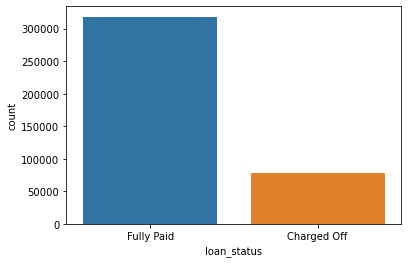

In [6]:
sns.countplot(data=df, x='loan_status')

**Create a histogram of the loan_amnt column.**

<AxesSubplot:>

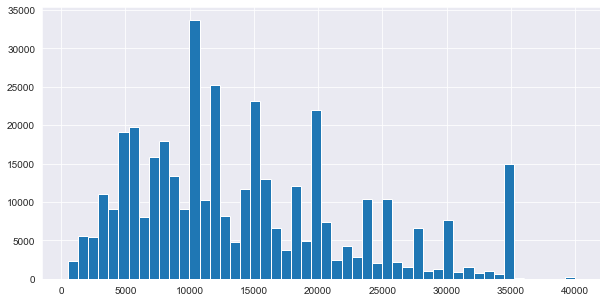

In [7]:
sns.set_style('dark')
plt.figure(figsize=(10,5))
df['loan_amnt'].hist(bins=50)

**Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables.**

In [8]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

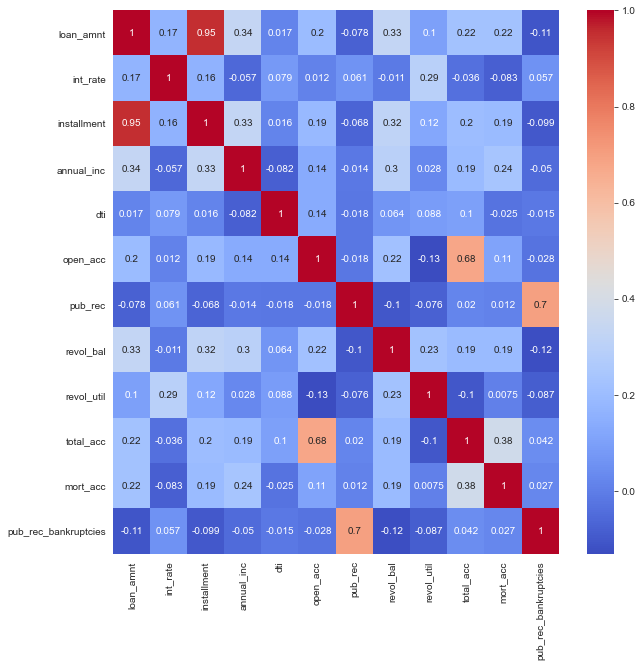

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'Installment vs Loan_amount')

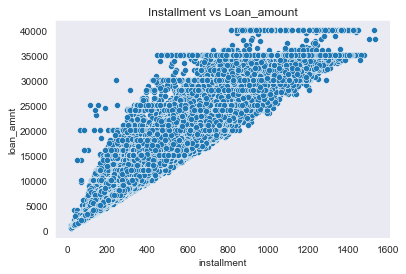

In [10]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
plt.title("Installment vs Loan_amount")

**Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

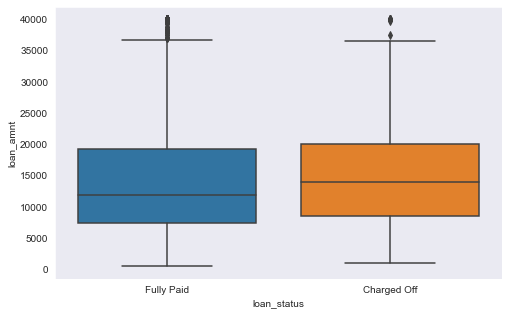

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**Calculating the summary statistics for the loan amount, grouped by the loan_status.**

In [12]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**explore the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [13]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [14]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

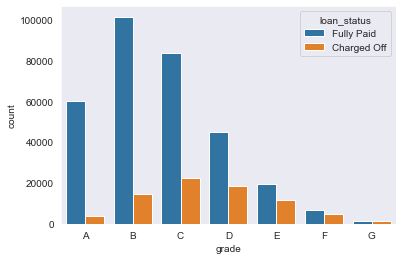

In [15]:
sns.countplot(x='grade',data=df,hue='loan_status', order = sorted(df['grade'].value_counts().index))

**Display a count plot per subgrade. Explore both all loans made per subgrade as well being separated based on the loan_status.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

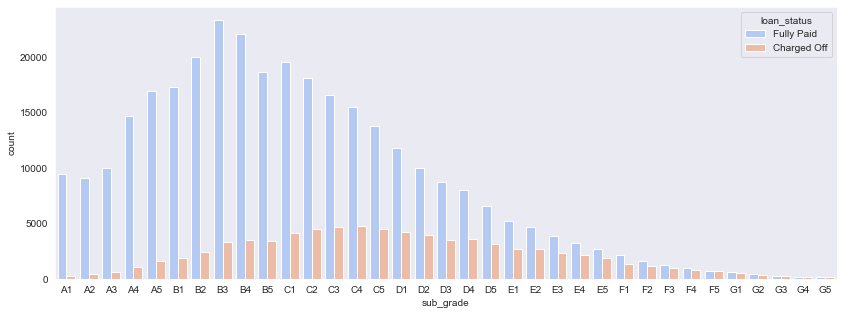

In [16]:
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade',data=df,order=sorted(df['sub_grade'].value_counts().index),palette='coolwarm',hue='loan_status')

**It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

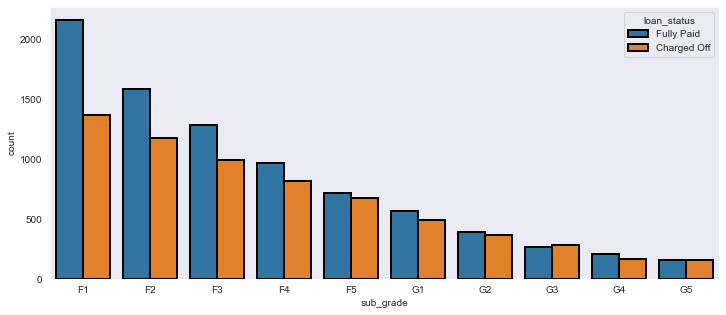

In [17]:
f_g_df = df[(df['grade']=='F') | (df['grade']=='G')]
plt.figure(figsize=(12,5))
sns.countplot(data=f_g_df,x='sub_grade',hue='loan_status', order=sorted(f_g_df['sub_grade'].value_counts().index),
                                lw=2, edgecolor='black')

**Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [18]:
def adapt(word):
    if word=='Fully Paid':
        return 1
    return 0
df['loan_repaid'] = df['loan_status'].apply(adapt)
# df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df['loan_repaid'].value_counts()

1    318357
0     77673
Name: loan_repaid, dtype: int64

**Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<AxesSubplot:>

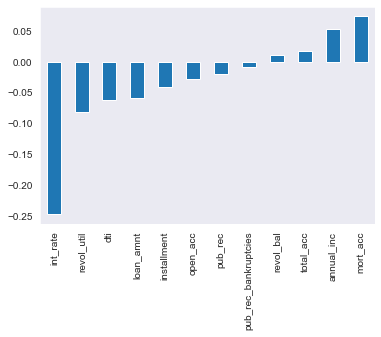

In [19]:
df.corr().drop('loan_repaid')['loan_repaid'].sort_values().plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [20]:
print('\nMissing precentage of total data per column\n')
print(df.isnull().sum() * 100 / len(df))


Missing precentage of total data per column

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [21]:
df['emp_title'].value_counts() # too many categories, around 17k, drop this column.
df.drop('emp_title',axis=1,inplace=True)

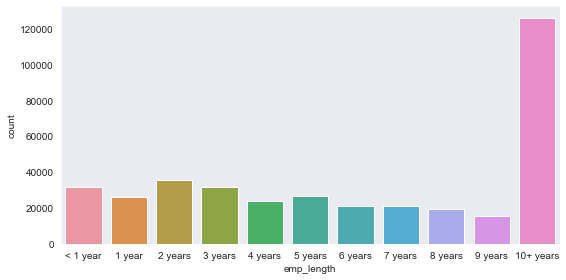

In [22]:
plt.figure(figsize=(8,4))
emp_len_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
sns.countplot(data=df,x='emp_length',order=emp_len_order)
plt.tight_layout()

**Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

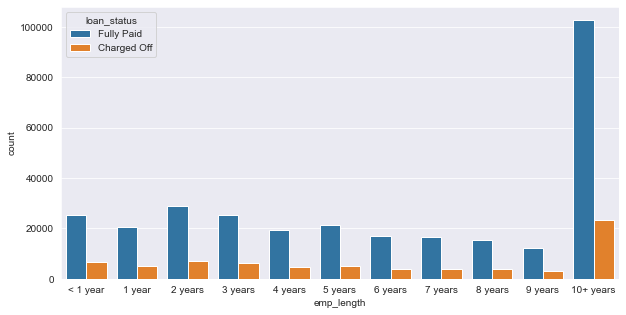

In [23]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x='emp_length',order=emp_len_order,hue='loan_status')


**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

<AxesSubplot:xlabel='emp_length'>

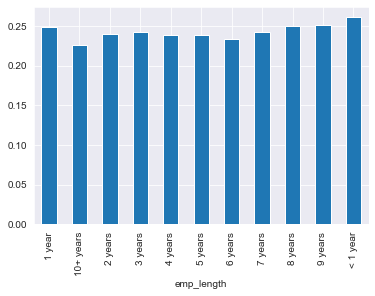

In [24]:
emp_len_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_len_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_len_precentage = emp_len_co / emp_len_fp
emp_len_precentage.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. drop the emp_length column.**

In [25]:
df.drop('emp_length',axis=1,inplace=True)

**Revisit the DataFrame to see what feature columns still have missing data.**

In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column. Similar duplicated information**

In [27]:
df['title'].value_counts()

Debt consolidation                       152472
Credit card refinancing                   51487
Home improvement                          15264
Other                                     12930
Debt Consolidation                        11608
                                          ...  
debt2                                         1
1K Home improvement                           1
Lowering Interest and Monthly Payment         1
Project Management Certificate                1
Debt Consolidation & Education                1
Name: title, Length: 48817, dtype: int64

In [28]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

**The title column is simply a string subcategory/description of the purpose column. drop the title column.**

In [29]:
df.drop('title',axis=1,inplace=True)

In [30]:
feat_info('mort_acc')
df['mort_acc'].value_counts()


Number of mortgage accounts.


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

**There are many ways we could deal with this missing data. We could just fill it in based on the mean of the other columns. Let's review the other columsn to see which most highly correlates to mort_acc**

In [31]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach.**

In [32]:
avg_total_acc = df.groupby('total_acc').mean()['mort_acc']

**fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above**

In [33]:
def fill_mort_acc_by_total_acc(mort_acc,total_acc):
    if np.isnan(mort_acc):
        return avg_total_acc[total_acc]
    else:
        return mort_acc

In [34]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc_by_total_acc(x['mort_acc'],x['total_acc']),axis=1)

In [35]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. we could just remove the rows that are missing those values in those columns with dropna().**

In [36]:
df.dropna(inplace=True)

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**List all the columns that are currently non-numeric**

In [37]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**Convert the term feature into either a 36 or 60 integer numeric data**

In [38]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [39]:
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [40]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [41]:
df.drop('grade',axis=1,inplace=True)

**Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe and drop the original subgrade column.**

In [42]:
dummy_subgrade = pd.get_dummies(df['sub_grade'],drop_first=True)

In [43]:
df = pd.concat([df.drop('sub_grade',axis=1),dummy_subgrade],axis=1)


### verification_status, application_type,initial_list_status,purpose 
**Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [44]:
df = pd.concat([df,
                pd.get_dummies(df['verification_status'],drop_first=True),
                pd.get_dummies(df['application_type'],drop_first=True),
                pd.get_dummies(df['initial_list_status'],drop_first=True),
                pd.get_dummies(df['purpose'],drop_first=True),],axis=1)

In [45]:
df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1,inplace=True)

### home_ownership
**Review the value_counts for the home_ownership column.**

In [46]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.**

In [47]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER',inplace=True)

In [48]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [49]:
df = pd.concat([df.drop('home_ownership',axis=1),home_ownership_dummies],axis=1)

### address
**Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [50]:
df['zip_code'] = df['address'].apply(lambda address : address[-5:])

In [51]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

**Now make this zip_code column into dummy variables using pandas.**

In [52]:
zip_code_dummy = pd.get_dummies(df['zip_code'],drop_first=True)

In [53]:
df.drop(['zip_code','address'],axis=1,inplace=True)

In [54]:
df = pd.concat([df,zip_code_dummy],axis=1)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [55]:
df.drop('issue_d',inplace=True,axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [56]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda timestamp: int(timestamp[-4:]))

In [57]:
df.drop('earliest_cr_line',inplace=True,axis=1)

## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

**drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [59]:
df.drop('loan_status',inplace=True,axis=1)

**Set X and y variables to the .values of the features and label.**

In [60]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

----
----
## Grabbing a Sample for Training Time

### Use .sample() to grab a sample of the all entries to save time on training.
----
----

In [61]:
df_sample = df.sample(frac=0.1,random_state=101)
print(len(df_sample))

39522


**Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

**import the necessary Keras functions.**

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.constraints import max_norm

**Build a sequential model to will be trained on the data. a model that goes 79 --> 40 --> 1 output neuron and between the layers there is dropout layer with 0.25 precentage rate**

In [66]:
# CODE HERE
model = Sequential()

model.add(Dense(79,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


**Fit the model to the training data and add in the validation data for later plotting.**

In [67]:
model.fit(X_train,y_train,epochs=40,batch_size=256, validation_data=(X_test,y_test))

Epoch 1/40
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2971 - val_loss: 0.2666
Epoch 2/40
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2647 - val_loss: 0.2634
Epoch 3/40
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2622 - val_loss: 0.2623
Epoch 4/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2613 - val_loss: 0.2622
Epoch 5/40
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2606 - val_loss: 0.2624
Epoch 6/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2600 - val_loss: 0.2623
Epoch 7/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2596 - val_loss: 0.2617
Epoch 8/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2594 - val_loss: 0.2613
Epoch 9/40
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2589 - val_loss: 0.2612
Epoch 10/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.258

**Save your model.**

In [68]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5')  

In [69]:
losses = pd.DataFrame(model.history.history)

# Section 3: Evaluating Model Performance.

**Plot out the validation loss versus the training loss.**

<AxesSubplot:>

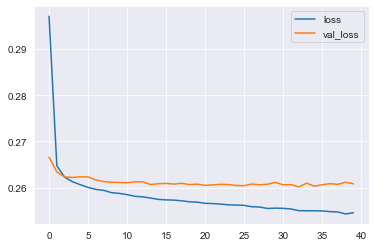

In [70]:
losses.plot()

**Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [71]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [72]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [73]:
confusion_matrix(y_test,predictions)

array([[ 7007,  8651],
       [  208, 63178]], dtype=int64)

**Given the customer below, would you offer this person a loan?**

In [74]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [75]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

**Now check, did this person actually end up paying back their loan?**

In [76]:
df.iloc[random_ind]['loan_repaid']

1.0

# GREAT JOB!